# FIRE INCIDENT




##  DATA SCIENCE PROJECT


### Group Members 
1. Naina Jain
2. Ashwini Gore
3. Ayushi Arora
4. Amisha Sancheti
5. Pranav Deshpande


### Contents
1. Introduction
2. Data Cleaning
3. Exploratory Data Analysis
4. Linear Regression Model
5. Summary


## Introduction


Fire spreads rapidly. Even a single minute delay in controlling the fire can cause a lot of disaster. So, It is important to control the fire as quick as possible. Catching fire has always been an issue, and there are different causes for a fire incident. According to the US fire administration, New York leads the nation in number of fire deaths. We have collected fire incident data of New York city in 2018. We have features like number of ladder unit, engines and other unit assigned for a fire incident. Also, incident reported time and fire brigade dispatch time, travelling time and closing time.We are analyzing various factor for a fire incident, and trying to find out the effects of various factors on the time taken by fire department to close the incident once it is reported. 



## Audience

Fire brigade department 



## Goals

Exploratory data analysis to understand relation between various features involved in resolving a fire incident.Predicting the total time taken for closing a fire incident once it is reported.



## Displaying the Dataset

### Importing required libraries

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from pandas import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn.metrics import mean_squared_error

### Reading data from csv file and priting first 5 rows to make sure data read properly

In [53]:
df=pd.read_csv('mainFireData.csv',header=0,index_col=0)
df.head()

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,1.800111e+15,01/01/2018 08:15:43 AM,MANHATTAN,1083,BROADWAY & 78 ST,MANHATTAN,10024.0,20.0,6.0,107.0,...,01/01/2018 08:16:18 AM,NaN,01/01/2018 08:21:25 AM,N,N,0,0,1,0,0
1,1.800144e+15,01/01/2018 08:16:50 AM,BRONX,4352,BRUNER AND ASTOR AVES,BRONX,10469.0,49.0,13.0,211.0,...,01/01/2018 08:33:50 AM,01/01/2018 08:37:25 AM,01/01/2018 08:45:42 AM,N,Y,1235,239,1,0,0
2,1.800115e+15,01/01/2018 08:16:55 AM,BROOKLYN,1540,BEVERLEY RD & E 19 ST,BROOKLYN,11226.0,70.0,40.0,314.0,...,01/01/2018 08:17:31 AM,01/01/2018 08:21:21 AM,01/01/2018 08:29:49 AM,N,Y,266,259,1,0,0
3,1.800108e+15,01/01/2018 08:17:32 AM,MANHATTAN,758,6 AVE & W 39 ST,MANHATTAN,10018.0,14.0,4.0,105.0,...,01/01/2018 08:18:36 AM,01/01/2018 08:23:52 AM,01/01/2018 08:27:21 AM,N,Y,380,325,1,0,1
4,1.800185e+15,01/01/2018 08:19:35 AM,QUEENS,8495,VAN WYCK EXPY-ATLANTIC AV TO ROCKAWAY BL,QUEENS,NaN,NaN,NaN,NaN,...,01/01/2018 08:20:14 AM,01/01/2018 08:28:02 AM,01/01/2018 09:15:11 AM,N,Y,507,491,2,2,1


### Fetching required columns and printing the shape of Dataframe

In [55]:
df = df[["INCIDENT_DATETIME","ALARM_BOX_BOROUGH","INCIDENT_CLASSIFICATION","INCIDENT_CLASSIFICATION_GROUP","DISPATCH_RESPONSE_SECONDS_QY","FIRST_ASSIGNMENT_DATETIME","FIRST_ACTIVATION_DATETIME","FIRST_ON_SCENE_DATETIME","INCIDENT_CLOSE_DATETIME","INCIDENT_RESPONSE_SECONDS_QY","INCIDENT_TRAVEL_TM_SECONDS_QY","ENGINES_ASSIGNED_QUANTITY","LADDERS_ASSIGNED_QUANTITY","OTHER_UNITS_ASSIGNED_QUANTITY"]]

In [56]:
df.shape

(618688, 14)

In [57]:
df.head()

,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ASSIGNMENT_DATETIME,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,01/01/2018 08:15:43 AM,MANHATTAN,Medical - EMS Link 10-91,Medical Emergencies,9,01/01/2018 08:15:52 AM,01/01/2018 08:16:18 AM,NaN,01/01/2018 08:21:25 AM,0,0,1,0,0
1,01/01/2018 08:16:50 AM,BRONX,Medical - Assist Civilian,Medical Emergencies,996,01/01/2018 08:33:26 AM,01/01/2018 08:33:50 AM,01/01/2018 08:37:25 AM,01/01/2018 08:45:42 AM,1235,239,1,0,0
2,01/01/2018 08:16:55 AM,BROOKLYN,Medical - Assist Civilian,Medical Emergencies,7,01/01/2018 08:17:02 AM,01/01/2018 08:17:31 AM,01/01/2018 08:21:21 AM,01/01/2018 08:29:49 AM,266,259,1,0,0
3,01/01/2018 08:17:32 AM,MANHATTAN,Alarm System - Defective,NonMedical Emergencies,55,01/01/2018 08:18:27 AM,01/01/2018 08:18:36 AM,01/01/2018 08:23:52 AM,01/01/2018 08:27:21 AM,380,325,1,0,1
4,01/01/2018 08:19:35 AM,QUEENS,Vehicle Accident - Other,NonMedical Emergencies,16,01/01/2018 08:19:51 AM,01/01/2018 08:20:14 AM,01/01/2018 08:28:02 AM,01/01/2018 09:15:11 AM,507,491,2,2,1


In [58]:
df.tail()

,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ASSIGNMENT_DATETIME,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
618683,12/31/2018 11:56:49 PM,MANHATTAN,Alarm System - Defective,NonMedical Emergencies,39,12/31/2018 11:57:28 PM,12/31/2018 11:57:47 PM,01/01/2019 12:00:51 AM,01/01/2019 12:14:05 AM,242,203,3,2,1
618684,12/31/2018 11:57:02 PM,BRONX,Carbon Monoxide - Code 1 - Investigation,NonMedical Emergencies,136,12/31/2018 11:59:18 PM,01/01/2019 12:02:23 AM,01/01/2019 12:02:55 AM,01/01/2019 12:09:40 AM,353,217,1,1,0
618685,12/31/2018 11:57:05 PM,BRONX,Medical - EMS Link 10-91,Medical Emergencies,4,12/31/2018 11:57:09 PM,12/31/2018 11:57:36 PM,NaN,12/31/2018 11:58:07 PM,0,0,1,0,0
618686,12/31/2018 11:58:14 PM,BROOKLYN,Medical - Assist Civilian,Medical Emergencies,4,12/31/2018 11:58:18 PM,12/31/2018 11:58:57 PM,01/01/2019 12:02:40 AM,01/01/2019 01:03:33 AM,266,262,1,0,0
618687,12/31/2018 11:59:59 PM,QUEENS,Medical - PD Link 10-91,Medical Emergencies,5,01/01/2019 12:00:04 AM,01/01/2019 12:00:30 AM,NaN,01/01/2019 12:04:57 AM,0,0,1,0,0


## Data Cleaning 

Data cleaning is a process of removing or correcting inaccurate records from our dataset which can create hurdles in performing data analysis and can lead us to inaccurate predictions. 

Usually large datasets tend to have missing values. Missing values can give us errors or abnormal analysis and can also effect the other accurate records in the dataset. Hence, it is necessary to remove or modify the missing values. 

We will now check for missing values in both our datasets. 

### Removing empty rows from data 

In [60]:
df.isna().sum()

INCIDENT_DATETIME                     0
ALARM_BOX_BOROUGH                     0
INCIDENT_CLASSIFICATION               0
INCIDENT_CLASSIFICATION_GROUP         0
DISPATCH_RESPONSE_SECONDS_QY          0
FIRST_ASSIGNMENT_DATETIME          3442
FIRST_ACTIVATION_DATETIME          5694
FIRST_ON_SCENE_DATETIME          110723
INCIDENT_CLOSE_DATETIME               0
INCIDENT_RESPONSE_SECONDS_QY          0
INCIDENT_TRAVEL_TM_SECONDS_QY         0
ENGINES_ASSIGNED_QUANTITY             0
LADDERS_ASSIGNED_QUANTITY             0
OTHER_UNITS_ASSIGNED_QUANTITY         0
dtype: int64

In [61]:
df=df.dropna()

In [62]:
df.isnull().sum()

INCIDENT_DATETIME                0
ALARM_BOX_BOROUGH                0
INCIDENT_CLASSIFICATION          0
INCIDENT_CLASSIFICATION_GROUP    0
DISPATCH_RESPONSE_SECONDS_QY     0
FIRST_ASSIGNMENT_DATETIME        0
FIRST_ACTIVATION_DATETIME        0
FIRST_ON_SCENE_DATETIME          0
INCIDENT_CLOSE_DATETIME          0
INCIDENT_RESPONSE_SECONDS_QY     0
INCIDENT_TRAVEL_TM_SECONDS_QY    0
ENGINES_ASSIGNED_QUANTITY        0
LADDERS_ASSIGNED_QUANTITY        0
OTHER_UNITS_ASSIGNED_QUANTITY    0
dtype: int64

### Reseting the index

In [63]:
df.reset_index(inplace=True)
df=df.drop('index',axis=1)
df.head()

,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ASSIGNMENT_DATETIME,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,01/01/2018 08:16:50 AM,BRONX,Medical - Assist Civilian,Medical Emergencies,996,01/01/2018 08:33:26 AM,01/01/2018 08:33:50 AM,01/01/2018 08:37:25 AM,01/01/2018 08:45:42 AM,1235,239,1,0,0
1,01/01/2018 08:16:55 AM,BROOKLYN,Medical - Assist Civilian,Medical Emergencies,7,01/01/2018 08:17:02 AM,01/01/2018 08:17:31 AM,01/01/2018 08:21:21 AM,01/01/2018 08:29:49 AM,266,259,1,0,0
2,01/01/2018 08:17:32 AM,MANHATTAN,Alarm System - Defective,NonMedical Emergencies,55,01/01/2018 08:18:27 AM,01/01/2018 08:18:36 AM,01/01/2018 08:23:52 AM,01/01/2018 08:27:21 AM,380,325,1,0,1
3,01/01/2018 08:19:35 AM,QUEENS,Vehicle Accident - Other,NonMedical Emergencies,16,01/01/2018 08:19:51 AM,01/01/2018 08:20:14 AM,01/01/2018 08:28:02 AM,01/01/2018 09:15:11 AM,507,491,2,2,1
4,01/01/2018 08:19:45 AM,BROOKLYN,Medical - Assist Civilian,Medical Emergencies,6,01/01/2018 08:19:51 AM,01/01/2018 08:20:49 AM,01/01/2018 08:27:57 AM,01/01/2018 08:39:52 AM,492,486,1,0,0


### Format Conversion 
Datatime in various columns are given in 12 hours and 24 hours format. 
So converting every columns every rows to 24 hours format. 

In [68]:
df["INCIDENT_DATETIME"]=df["INCIDENT_DATETIME"].apply(pd.to_datetime)

In [69]:
df["FIRST_ASSIGNMENT_DATETIME"]=df["FIRST_ASSIGNMENT_DATETIME"].apply(pd.to_datetime)

In [70]:
df["FIRST_ON_SCENE_DATETIME"]=df["FIRST_ON_SCENE_DATETIME"].apply(pd.to_datetime)

In [71]:
df["FIRST_ACTIVATION_DATETIME"]=df["FIRST_ACTIVATION_DATETIME"].apply(pd.to_datetime)

In [72]:
df["INCIDENT_CLOSE_DATETIME"]=df["INCIDENT_CLOSE_DATETIME"].apply(pd.to_datetime)

In [74]:
df.head()

,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP,DISPATCH_RESPONSE_SECONDS_QY,FIRST_ASSIGNMENT_DATETIME,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,2018-01-01 08:16:50,BRONX,Medical - Assist Civilian,Medical Emergencies,996,2018-01-01 08:33:26,2018-01-01 08:33:50,2018-01-01 08:37:25,2018-01-01 08:45:42,1235,239,1,0,0
1,2018-01-01 08:16:55,BROOKLYN,Medical - Assist Civilian,Medical Emergencies,7,2018-01-01 08:17:02,2018-01-01 08:17:31,2018-01-01 08:21:21,2018-01-01 08:29:49,266,259,1,0,0
2,2018-01-01 08:17:32,MANHATTAN,Alarm System - Defective,NonMedical Emergencies,55,2018-01-01 08:18:27,2018-01-01 08:18:36,2018-01-01 08:23:52,2018-01-01 08:27:21,380,325,1,0,1
3,2018-01-01 08:19:35,QUEENS,Vehicle Accident - Other,NonMedical Emergencies,16,2018-01-01 08:19:51,2018-01-01 08:20:14,2018-01-01 08:28:02,2018-01-01 09:15:11,507,491,2,2,1
4,2018-01-01 08:19:45,BROOKLYN,Medical - Assist Civilian,Medical Emergencies,6,2018-01-01 08:19:51,2018-01-01 08:20:49,2018-01-01 08:27:57,2018-01-01 08:39:52,492,486,1,0,0


##  Exploratory Data Analysis

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

#### 1. Bar plot of numbers incidents in all the months of 2018

Text(0, 0.5, 'Num of INCIDENTS')

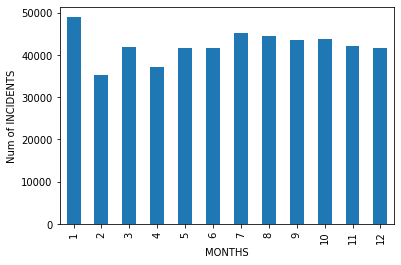

In [75]:
df["INCIDENT_DATETIME"].groupby(df['INCIDENT_DATETIME'].dt.month).count().plot(kind='bar')
plt.xlabel('MONTHS')
plt.ylabel('Num of INCIDENTS')

#### 2. Scatter plot of incident closing time on the month of january

In [76]:
x = (df['INCIDENT_CLOSE_DATETIME'] - df['INCIDENT_DATETIME']).astype('timedelta64[s]')
total_incident_time = x/(60)
df['total_incident_time']=total_incident_time
total_incident_time_avg = np.mean(total_incident_time)

In [77]:
Jan_data = df[df["INCIDENT_CLOSE_DATETIME"].dt.month == 1]

Text(0, 0.5, 'Incident closing time in seconds')

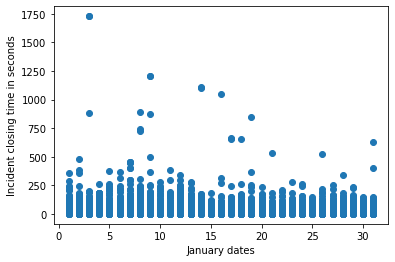

In [78]:
plt.scatter(Jan_data['INCIDENT_CLOSE_DATETIME'].dt.day, Jan_data['total_incident_time'])
plt.xlabel('January dates')
plt.ylabel('Incident closing time in seconds')

#### 3. Pie Chart of various categories fire incidents

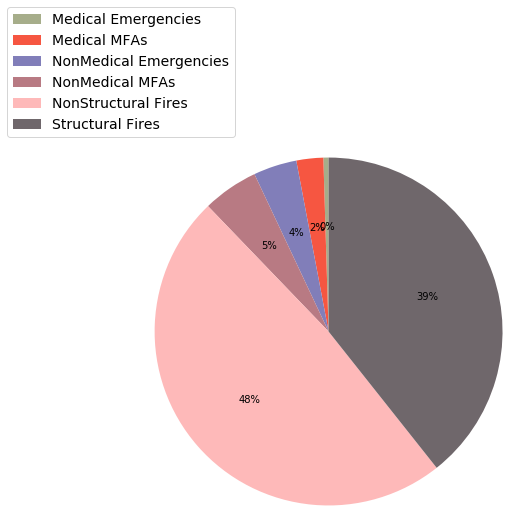

In [79]:
labels = ('Medical Emergencies','Medical MFAs','NonMedical Emergencies','NonMedical MFAs', 'NonStructural Fires','Structural Fires')
INCIDENT_CLASSIFICATION_GROUP_count = pd.value_counts(df['INCIDENT_CLASSIFICATION_GROUP'].values,sort = False)
colors = ['#a6ad8a', '#f65641', '#817eb9', '#b87a83', '#feb9b9', '#6f676b']
plt.pie(INCIDENT_CLASSIFICATION_GROUP_count, colors=colors, startangle=90,autopct='%1.00f%%',radius = 2)
plt.legend(labels,loc="upper right",bbox_to_anchor=(0.10,2.025),prop={'size': 14})

plt.show()

#### 4. Scatter plot of travelling time on the month of january

Text(0, 0.5, 'Travel time in seconds')

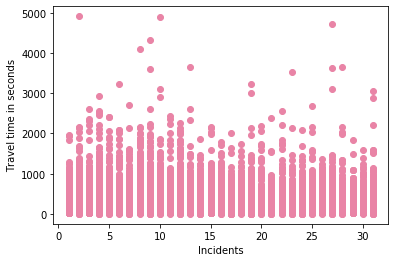

In [80]:

plt.scatter(Jan_data['INCIDENT_CLOSE_DATETIME'].dt.day, Jan_data['INCIDENT_TRAVEL_TM_SECONDS_QY'], color = '#E984A6')
plt.xlabel('Incidents')
plt.ylabel('Travel time in seconds')

#### 5. Scatter plot of dispatch response time on the month of january

Text(0, 0.5, 'Dispatch reponse in seconds')

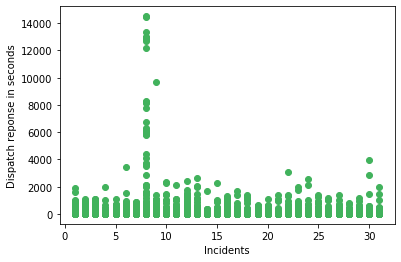

In [81]:
plt.scatter(Jan_data['INCIDENT_DATETIME'].dt.day, Jan_data['DISPATCH_RESPONSE_SECONDS_QY'],color = '#41B25C')
plt.xlabel('Incidents')
plt.ylabel('Dispatch reponse in seconds')

#### 6. Average time taken for incident closing, responsing & travelling

In [82]:
print("Average value of total time taken to close the case in minutes")
print(np.mean(total_incident_time))

print("Average value of total time taken for fire department to dispatch after the reporting in seconds")
print(np.mean(df['DISPATCH_RESPONSE_SECONDS_QY']))


print("Average value of total time taken for fire department to reach incident place in minutes")
print(np.mean(df['INCIDENT_TRAVEL_TM_SECONDS_QY']/60))



Average value of total time taken to close the case in minutes
23.057202098081667
Average value of total time taken for fire department to dispatch after the reporting in seconds
37.97466330132313
Average value of total time taken for fire department to reach incident place in minutes
4.918937287611933


#### 7. Average time taken to close incident, when incident occured at different time of a day

In [83]:
df['incident_dt_hour']=df['INCIDENT_DATETIME'].dt.hour

In [84]:
df['incident_dt_hour'] = df.incident_dt_hour.astype(int)

In [85]:
hour_range = range(0,24)
sum = []
avg_time = []
for j in hour_range:
    sum.append(0) 
    avg_time.append(0)

In [86]:
for i in hour_range:
    sum[i] = df[df["incident_dt_hour"] == i]['total_incident_time']
    avg_time[i] = np.sum(sum[i])/sum[i].size


Text(0, 0.5, 'average incident close time')

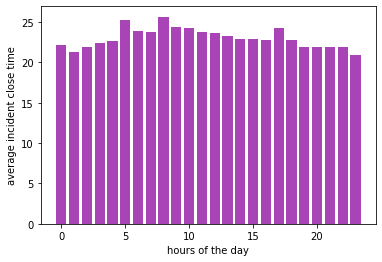

In [87]:
plt.bar(hour_range, avg_time, color = '#A944B6')
plt.xlabel('hours of the day')
plt.ylabel('average incident close time')

#### 8. Scatter plot of ladder assigned vs incident close time

In [88]:
df_inci_ladd=df[['LADDERS_ASSIGNED_QUANTITY','total_incident_time']]
df_inci_ladd= df_inci_ladd.replace(0, np.nan)
df_inci_ladd=df_inci_ladd.dropna()
df_inci_ladd=df_inci_ladd.astype({'LADDERS_ASSIGNED_QUANTITY':int})
df_inci_ladd.reset_index(inplace=True,drop=True)
df_inci_ladd.head()

,LADDERS_ASSIGNED_QUANTITY,total_incident_time
0,2,55.600000
1,1,24.366667
2,1,23.116667
3,2,21.033333
4,1,68.450000


Text(0.5, 0, 'Number of ladders assigned')

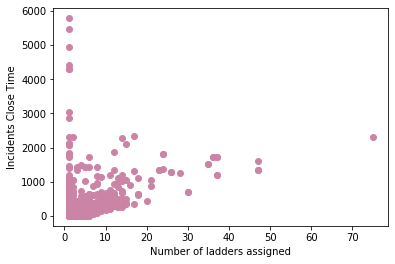

In [90]:
plt.scatter(df_inci_ladd['LADDERS_ASSIGNED_QUANTITY'],df_inci_ladd['total_incident_time'], color = '#CC84A6')
plt.ylabel('Incidents Close Time')
plt.xlabel('Number of ladders assigned')

####  9. Scatter plot of number of engine assigned vs incident close time

In [91]:
df_inci_engi=df[['ENGINES_ASSIGNED_QUANTITY','total_incident_time']]
df_inci_engi= df_inci_engi.replace(0, np.nan)
df_inci_engi=df_inci_engi.dropna()
df_inci_engi=df_inci_engi.astype({'ENGINES_ASSIGNED_QUANTITY':int})
df_inci_engi.reset_index(inplace=True,drop=True)
df_inci_engi.head()

,ENGINES_ASSIGNED_QUANTITY,total_incident_time
0,1,28.866667
1,1,12.900000
2,1,9.816667
3,2,55.600000
4,1,20.116667


Text(0.5, 0, 'Number of engines assigned')

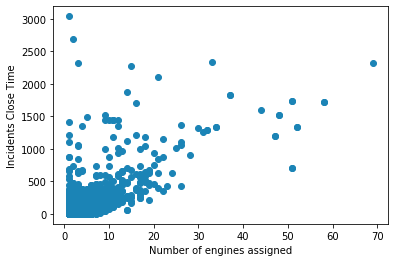

In [92]:
plt.scatter( df_inci_engi['ENGINES_ASSIGNED_QUANTITY'],df_inci_engi['total_incident_time'], color = '#1B84B6')
plt.ylabel('Incidents Close Time')
plt.xlabel('Number of engines assigned')

####  10. Scatter plot of number of other unit assigned vs incident close time

In [93]:
df_inci_ounit=df[['OTHER_UNITS_ASSIGNED_QUANTITY','total_incident_time']]
df_inci_ounit= df_inci_ounit.replace(0, np.nan)
df_inci_ounit=df_inci_ounit.dropna()
df_inci_ounit=df_inci_ounit.astype({'OTHER_UNITS_ASSIGNED_QUANTITY':int})
df_inci_ounit.reset_index(inplace=True,drop=True)
df_inci_ounit.head()

,OTHER_UNITS_ASSIGNED_QUANTITY,total_incident_time
0,1,9.816667
1,1,55.600000
2,1,21.033333
3,2,68.450000
4,1,14.283333


Text(0.5, 0, 'Number of other unit assigned')

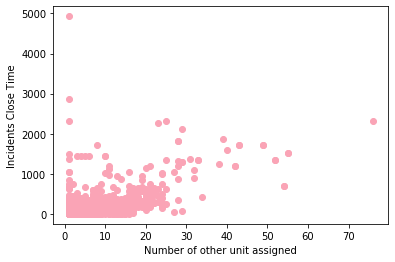

In [94]:
plt.scatter(df_inci_ounit['OTHER_UNITS_ASSIGNED_QUANTITY'],df_inci_ounit['total_incident_time'], color = '#FAA4B6')
plt.ylabel('Incidents Close Time')
plt.xlabel('Number of other unit assigned')

####  11. Scatter plot of Incidents TravelTime vs incident close time

Text(0.5, 0, 'Incidents TravelTime')

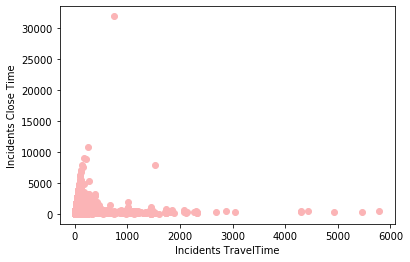

In [96]:
plt.scatter(df['total_incident_time'], df['INCIDENT_TRAVEL_TM_SECONDS_QY'], color = '#FBB4B6')
plt.ylabel('Incidents Close Time')
plt.xlabel('Incidents TravelTime')

#### 12. Heat map to see correlation between various features

In [157]:
x1=df[['incident_dt_hour','INCIDENT_RESPONSE_SECONDS_QY','INCIDENT_TRAVEL_TM_SECONDS_QY','ENGINES_ASSIGNED_QUANTITY','LADDERS_ASSIGNED_QUANTITY','OTHER_UNITS_ASSIGNED_QUANTITY','total_incident_time']]
x1= x1.replace(0, np.nan)
x1=x1.dropna()
x1=x1.astype({'incident_dt_hour':int,'ENGINES_ASSIGNED_QUANTITY':int,'LADDERS_ASSIGNED_QUANTITY':int,'OTHER_UNITS_ASSIGNED_QUANTITY':int})
x1.reset_index(inplace=True,drop=True)

x1.head()



,incident_dt_hour,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY,total_incident_time
0,8,507,491.0,2,2,1,55.600000
1,8,279,227.0,3,2,1,21.033333
2,8,194,147.0,1,1,2,68.450000
3,8,266,257.0,3,2,1,14.283333
4,8,233,213.0,2,2,1,11.983333


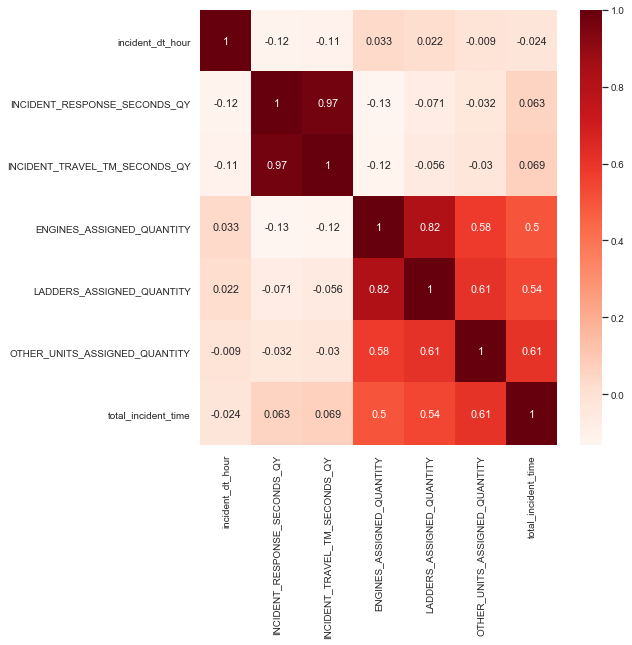

In [158]:
sns.set(font_scale=.9)
plt.figure(figsize=(8,8))
cor = x1.corr()
ax = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# Linear Regression Model

#### 1. Normalized data 

In [159]:
x1.iloc[:,0] = ((x1['incident_dt_hour'])-min(x1['incident_dt_hour']))/(max(x1['incident_dt_hour'])-(min(x1['incident_dt_hour']))) 
x1.iloc[:,1] = ((x1['INCIDENT_RESPONSE_SECONDS_QY'])-min(x1['INCIDENT_RESPONSE_SECONDS_QY']))/(max(x1['INCIDENT_RESPONSE_SECONDS_QY'])-(min(x1['INCIDENT_RESPONSE_SECONDS_QY']))) 
x1.iloc[:,2] = ((x1['INCIDENT_TRAVEL_TM_SECONDS_QY'])-min(x1['INCIDENT_TRAVEL_TM_SECONDS_QY']))/(max(x1['INCIDENT_TRAVEL_TM_SECONDS_QY'])-(min(x1['INCIDENT_TRAVEL_TM_SECONDS_QY']))) 
x1.iloc[:,3] = ((x1['ENGINES_ASSIGNED_QUANTITY'])-min(x1['ENGINES_ASSIGNED_QUANTITY']))/(max(x1['ENGINES_ASSIGNED_QUANTITY'])- min(x1['ENGINES_ASSIGNED_QUANTITY'])) 
x1.iloc[:,4] = ((x1['LADDERS_ASSIGNED_QUANTITY'])-min(x1['LADDERS_ASSIGNED_QUANTITY']))/(max(x1['LADDERS_ASSIGNED_QUANTITY'])- min(x1['LADDERS_ASSIGNED_QUANTITY'])) 
x1.iloc[:,5] = ((x1['OTHER_UNITS_ASSIGNED_QUANTITY'])- min(x1['OTHER_UNITS_ASSIGNED_QUANTITY']))/(max(x1['OTHER_UNITS_ASSIGNED_QUANTITY'])- min(x1['OTHER_UNITS_ASSIGNED_QUANTITY']))

In [160]:
# converting total incident time into seconds
# df_y is total iincident time in seconds
df_y=x1[['total_incident_time']]*60

In [161]:
y=df_y[['total_incident_time']]
y.head()

,total_incident_time
0,3336.0
1,1262.0
2,4107.0
3,857.0
4,719.0


#### 2. Splitting of data into test and train data

In [162]:
train_data_x1=x1.drop(columns='total_incident_time',axis=1)
train_data_x1 =train_data_x1[:100000]

In [163]:
train_data_x1.tail()

,incident_dt_hour,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
99995,0.818182,0.070241,0.075561,0.029412,0.013514,0.000000
99996,0.818182,0.048896,0.059121,0.000000,0.000000,0.013333
99997,0.818182,0.096798,0.110338,0.014706,0.000000,0.000000
99998,0.818182,0.202532,0.246285,0.029412,0.027027,0.000000
99999,0.818182,0.048399,0.060386,0.014706,0.013514,0.000000


In [165]:
train_data_y = y[:100000]

In [166]:
train_data_y.head()

,total_incident_time
0,3336.0
1,1262.0
2,4107.0
3,857.0
4,719.0


In [167]:
test_data_x1=x1.drop(columns='total_incident_time',axis=1)
test_data_x1=test_data_x1[100001:]

In [168]:
test_data_x1.head()
test_data_x1.shape

(39921, 6)

In [169]:
test_data_y = y[100001:]
test_data_y.head()


,total_incident_time
100001,867.0
100002,1436.0
100003,1099.0
100004,1094.0
100005,733.0


#### 3. Linear Regression using ladder assigned quntatity as single feature

In [170]:
train_ladders = train_data_x1['LADDERS_ASSIGNED_QUANTITY']
test_ladders = test_data_x1['LADDERS_ASSIGNED_QUANTITY']

In [171]:
X = train_data_x1[['LADDERS_ASSIGNED_QUANTITY']]

In [172]:
y = train_data_y

In [173]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(test_data_x1[['LADDERS_ASSIGNED_QUANTITY']]) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     total_incident_time   R-squared (uncentered):                   0.526
Model:                             OLS   Adj. R-squared (uncentered):              0.526
Method:                  Least Squares   F-statistic:                          1.111e+05
Date:                 Sun, 08 Dec 2019   Prob (F-statistic):                        0.00
Time:                         13:26:13   Log-Likelihood:                     -8.9589e+05
No. Observations:               100000   AIC:                                  1.792e+06
Df Residuals:                    99999   BIC:                                  1.792e+06
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
LADDERS_ASSIGNED_QUANTITY  1.211e+05    363.292    333.271      0.000     1.2e+05    1.22e+05
==============================================================================
Omnibus:                   202081.710   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2353757268.522
Skew:                          16.178   Prob(JB):                         0.00
Kurtosis:                     753.903   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
regressor = LinearRegression()
regressor.fit(train_ladders.to_frame(), train_data_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

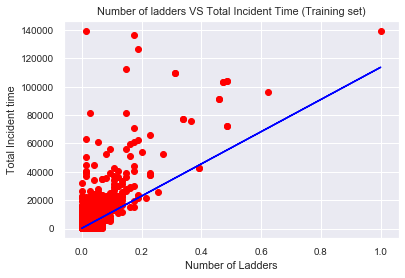

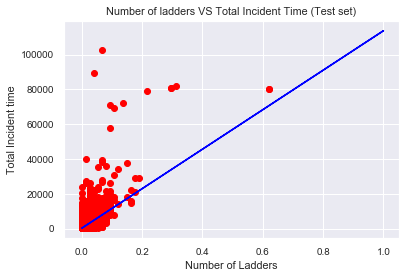

In [175]:
# Visualizing the Train set results

viz_train = plt
viz_train.scatter(train_ladders.to_frame(), train_data_y, color='red')
viz_train.plot(train_ladders.to_frame(), regressor.predict(train_ladders.to_frame()), color='blue')
viz_train.title('Number of ladders VS Total Incident Time (Training set)')
viz_train.xlabel('Number of Ladders')
viz_train.ylabel('Total Incident time')
viz_train.show()



# Visualizing the Test set results

viz_test = plt
viz_test.scatter(test_ladders.to_frame(),test_data_y, color='red')
viz_test.plot(train_ladders.to_frame(), regressor.predict(train_ladders.to_frame()), color='blue')
viz_test.title('Number of ladders VS Total Incident Time (Test set)')
viz_test.xlabel('Number of Ladders')
viz_test.ylabel('Total Incident time')
viz_test.show()

#### 3. Linear Regression using engine assigned quntatity as single feature

In [176]:
train_engines = train_data_x1['ENGINES_ASSIGNED_QUANTITY']
test_engines = test_data_x1['ENGINES_ASSIGNED_QUANTITY']

In [177]:
X = train_data_x1[['ENGINES_ASSIGNED_QUANTITY']]

In [178]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(test_data_x1[['ENGINES_ASSIGNED_QUANTITY']]) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     total_incident_time   R-squared (uncentered):                   0.489
Model:                             OLS   Adj. R-squared (uncentered):              0.488
Method:                  Least Squares   F-statistic:                          9.550e+04
Date:                 Sun, 08 Dec 2019   Prob (F-statistic):                        0.00
Time:                         13:27:39   Log-Likelihood:                     -8.9972e+05
No. Observations:               100000   AIC:                                  1.799e+06
Df Residuals:                    99999   BIC:                                  1.799e+06
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
ENGINES_ASSIGNED_QUANTITY  6.663e+04    215.605    309.038      0.000    6.62e+04    6.71e+04
==============================================================================
Omnibus:                   205413.071   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2382435749.402
Skew:                          16.842   Prob(JB):                         0.00
Kurtosis:                     758.414   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
regressor = LinearRegression()
regressor.fit(train_engines.to_frame(), train_data_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

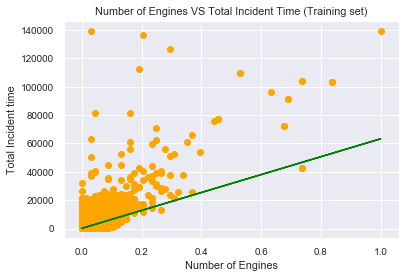

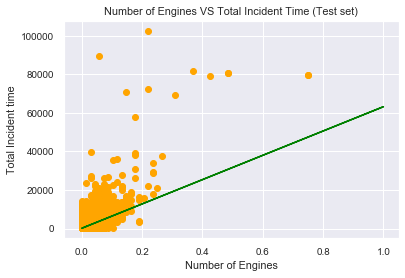

In [180]:
# Visualizing the Train set results

viz_train = plt
viz_train.scatter(train_engines.to_frame(), train_data_y, color='orange')
viz_train.plot(train_engines.to_frame(), regressor.predict(train_engines.to_frame()), color='green')
viz_train.title('Number of Engines VS Total Incident Time (Training set)')
viz_train.xlabel('Number of Engines')
viz_train.ylabel('Total Incident time')
viz_train.show()



# Visualizing the Test set results

viz_test = plt
viz_test.scatter(test_engines.to_frame(),test_data_y, color='orange')
viz_test.plot(train_engines.to_frame(), regressor.predict(train_engines.to_frame()), color='green')
viz_test.title('Number of Engines VS Total Incident Time (Test set)')
viz_test.xlabel('Number of Engines')
viz_test.ylabel('Total Incident time')
viz_test.show()

#### 3. Linear Regression using other unit assigned quntatity as single feature

In [181]:
train_other = train_data_x1['OTHER_UNITS_ASSIGNED_QUANTITY']
test_other = test_data_x1['OTHER_UNITS_ASSIGNED_QUANTITY']

In [182]:
X = train_data_x1[['OTHER_UNITS_ASSIGNED_QUANTITY']]

In [183]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(test_data_x1[['OTHER_UNITS_ASSIGNED_QUANTITY']]) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     total_incident_time   R-squared (uncentered):                   0.390
Model:                             OLS   Adj. R-squared (uncentered):              0.390
Method:                  Least Squares   F-statistic:                          6.394e+04
Date:                 Sun, 08 Dec 2019   Prob (F-statistic):                        0.00
Time:                         13:28:13   Log-Likelihood:                     -9.0852e+05
No. Observations:               100000   AIC:                                  1.817e+06
Df Residuals:                    99999   BIC:                                  1.817e+06
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
OTHER_UNITS_ASSIGNED_QUANTITY  8.975e+04    354.942    252.863      0.000    8.91e+04    9.04e+04
==============================================================================
Omnibus:                   195439.689   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2507565169.348
Skew:                          14.874   Prob(JB):                         0.00
Kurtosis:                     778.197   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
regressor = LinearRegression()
regressor.fit(train_other.to_frame(), train_data_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

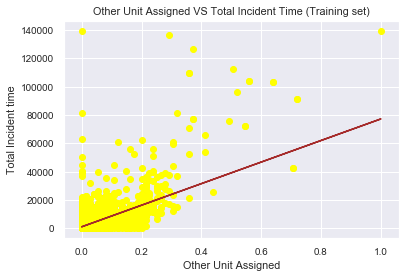

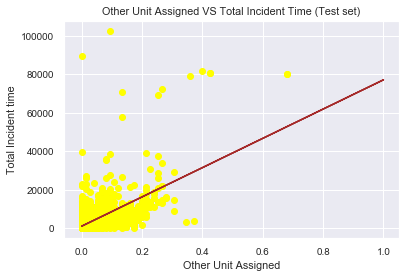

In [185]:
# Visualizing the Train set results

viz_train = plt
viz_train.scatter(train_other.to_frame(), train_data_y, color='yellow')
viz_train.plot(train_other.to_frame(), regressor.predict(train_other.to_frame()), color='brown')
viz_train.title('Other Unit Assigned VS Total Incident Time (Training set)')
viz_train.xlabel('Other Unit Assigned')
viz_train.ylabel('Total Incident time')
viz_train.show()



# Visualizing the Test set results

viz_test = plt
viz_test.scatter(test_other.to_frame(),test_data_y, color='yellow')
viz_test.plot(train_other.to_frame(), regressor.predict(train_other.to_frame()), color='brown')
viz_test.title('Other Unit Assigned VS Total Incident Time (Test set)')
viz_test.xlabel('Other Unit Assigned')
viz_test.ylabel('Total Incident time')
viz_test.show()


#### 3. Linear Regression using incident_dt_hour  as single feature

In [186]:
X = train_data_x1[['incident_dt_hour']]

In [187]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(test_data_x1[['incident_dt_hour']]) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     total_incident_time   R-squared (uncentered):                   0.248
Model:                             OLS   Adj. R-squared (uncentered):              0.248
Method:                  Least Squares   F-statistic:                          3.301e+04
Date:                 Sun, 08 Dec 2019   Prob (F-statistic):                        0.00
Time:                         13:29:03   Log-Likelihood:                     -9.1898e+05
No. Observations:               100000   AIC:                                  1.838e+06
Df Residuals:                    99999   BIC:                                  1.838e+06
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
incident_dt_hour  2141.5813     11.788    181.676      0.000    2118.477    2164.685
==============================================================================
Omnibus:                   230904.531   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3574464161.285
Skew:                          22.424   Prob(JB):                         0.00
Kurtosis:                     928.127   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 4. Linear Regression using INCIDENT_RESPONSE_SECONDS_QY  as single feature

In [189]:
X = train_data_x1[['INCIDENT_RESPONSE_SECONDS_QY']]

In [190]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(test_data_x1[['INCIDENT_RESPONSE_SECONDS_QY']]) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     total_incident_time   R-squared (uncentered):                   0.288
Model:                             OLS   Adj. R-squared (uncentered):              0.288
Method:                  Least Squares   F-statistic:                          4.053e+04
Date:                 Sun, 08 Dec 2019   Prob (F-statistic):                        0.00
Time:                         13:30:00   Log-Likelihood:                     -9.1623e+05
No. Observations:               100000   AIC:                                  1.832e+06
Df Residuals:                    99999   BIC:                                  1.832e+06
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
INCIDENT_RESPONSE_SECONDS_QY  1.947e+04     96.720    201.317      0.000    1.93e+04    1.97e+04
==============================================================================
Omnibus:                   237241.536   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4263677500.889
Skew:                          23.961   Prob(JB):                         0.00
Kurtosis:                    1013.439   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 5. Linear Regression using INCIDENT_TRAVEL_TM_SECONDS_QY  as single feature

In [191]:
X = train_data_x1[['INCIDENT_TRAVEL_TM_SECONDS_QY']]

In [192]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(test_data_x1[['INCIDENT_TRAVEL_TM_SECONDS_QY']]) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     total_incident_time   R-squared (uncentered):                   0.285
Model:                             OLS   Adj. R-squared (uncentered):              0.285
Method:                  Least Squares   F-statistic:                          3.988e+04
Date:                 Sun, 08 Dec 2019   Prob (F-statistic):                        0.00
Time:                         13:30:37   Log-Likelihood:                     -9.1646e+05
No. Observations:               100000   AIC:                                  1.833e+06
Df Residuals:                    99999   BIC:                                  1.833e+06
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
INCIDENT_TRAVEL_TM_SECONDS_QY  1.725e+04     86.352    199.712      0.000    1.71e+04    1.74e+04
==============================================================================
Omnibus:                   236730.063   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4209691687.866
Skew:                          23.834   Prob(JB):                         0.00
Kurtosis:                    1007.019   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 6. Multiple Linear Regression 

In [193]:
X = train_data_x1

In [194]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(test_data_x1) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     total_incident_time   R-squared (uncentered):                   0.617
Model:                             OLS   Adj. R-squared (uncentered):              0.617
Method:                  Least Squares   F-statistic:                          2.689e+04
Date:                 Sun, 08 Dec 2019   Prob (F-statistic):                        0.00
Time:                         13:31:25   Log-Likelihood:                     -8.8521e+05
No. Observations:               100000   AIC:                                  1.770e+06
Df Residuals:                    99994   BIC:                                  1.770e+06
Df Model:                            6                                                  
Covariance Type:             nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
incident_dt_hour               -129.3457     16.547     -7.817      0.000    -161.778     -96.914
INCIDENT_RESPONSE_SECONDS_QY   4745.0863    798.109      5.945      0.000    3180.803    6309.369
INCIDENT_TRAVEL_TM_SECONDS_QY  3299.9163    688.726      4.791      0.000    1950.021    4649.812
ENGINES_ASSIGNED_QUANTITY      9022.3407    512.642     17.600      0.000    8017.569       1e+04
LADDERS_ASSIGNED_QUANTITY      4.902e+04    885.855     55.336      0.000    4.73e+04    5.08e+04
OTHER_UNITS_ASSIGNED_QUANTITY  5.254e+04    368.663    142.516      0.000    5.18e+04    5.33e+04
==============================================================================
Omnibus:                   212937.203   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3964001430.811
Skew:                          18.177   Prob(JB):                         0.00
Kurtosis:                     977.699   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Summary

We have build various simple linear regression model to predict the fire incident closing time.
Individually they had a prective power of at max 52%.
Predictive power of various features:

1. LADDERS_ASSIGNED_QUANTITY       : 52.6%
2. ENGINES_ASSIGNED_QUANTITY       : 48.8%
3. OTHER_UNITS_ASSIGNED_QUANTITY   : 39.0%
4. INCIDENT_RESPONSE_SECONDS_QY    : 28.8%
5. INCIDENT_TRAVEL_TM_SECONDS_QY   : 28.5%
6. incident_dt_hour                : 24.8%

The Multiple Linear Regression model we have build can predict the fire incident closing time with an accuracy of 61.7%.

# Reference
1. https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
2. https://seaborn.pydata.org/generated/seaborn.heatmap.html
3. https://matplotlib.org/
4. https://www.statsmodels.org/stable/index.html